<a href="https://colab.research.google.com/github/ATPONNUTTAYOTHIN781/Statistical-Learning-Labs/blob/main/Lab05_decision_tree_bagging_RF_660510781.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LAB05 660510781 อรรถพล นุตตโยธิน

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [1]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [2]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [3]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [4]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

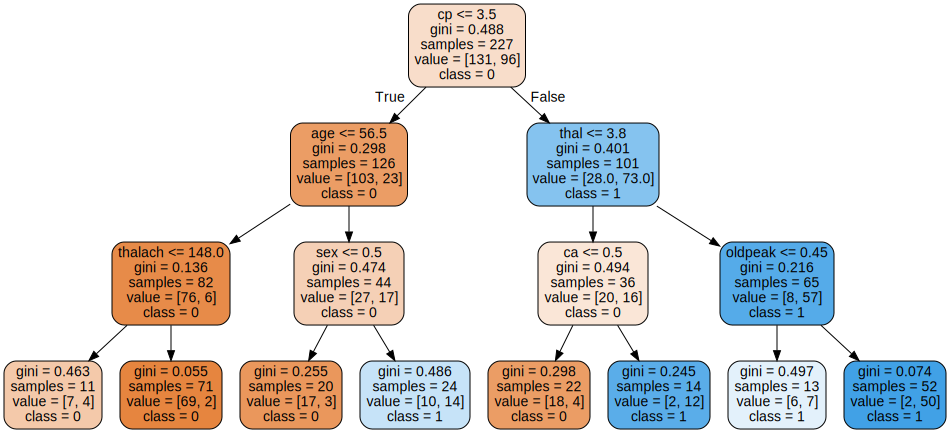

In [5]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [6]:
clf = DecisionTreeClassifier()

## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

--- กำลังค้นหาโมเดล Decision Tree ที่ดีที่สุด ---
--- กำลังค้นหาโมเดล Bagging ที่ดีที่สุด ---
--- กำลังค้นหาโมเดล Random Forest ที่ดีที่สุด ---

--- ผลการประเมินบน Test Set ---
โมเดล: Decision Tree
  - Accuracy: 0.7763
  - F1 Macro: 0.7753

โมเดล: Bagging
  - Accuracy: 0.8421
  - F1 Macro: 0.8420

โมเดล: Random Forest
  - Accuracy: 0.8553
  - F1 Macro: 0.8550

โมเดลที่ดีที่สุด (พิจารณาจาก F1 Macro) คือ: Random Forest

--- กำลังสร้างกราฟสำหรับ Decision Tree ที่ดีที่สุด ---


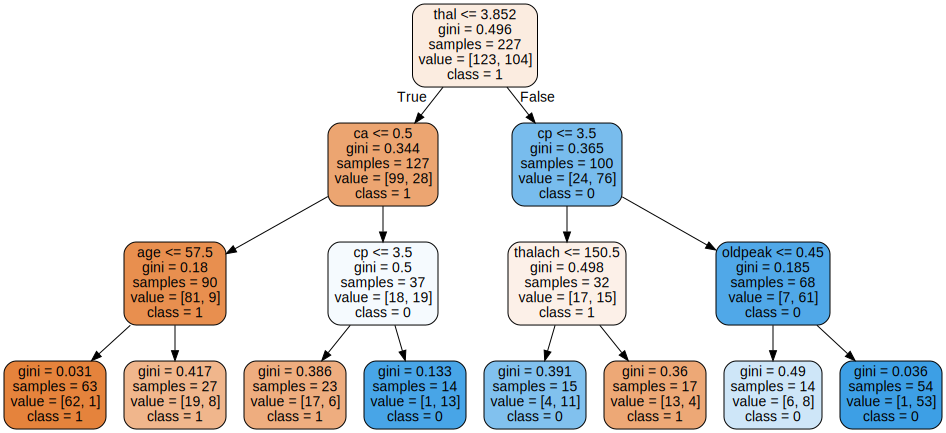


--- สรุป Hyperparameters ที่เลือกและค่าที่ดีที่สุด ---

1. Decision Tree:
   Hyperparameters ที่เลือก:
     - เกณฑ์การแบ่งโหนด (criterion): วิธีการวัดคุณภาพของการแบ่งข้อมูลในแต่ละจุด
     - ความลึกสูงสุดของต้นไม้ (max_depth): จำนวนชั้นสูงสุดที่ต้นไม้สามารถแตกกิ่งก้านออกไปได้
     - จำนวนตัวอย่างขั้นต่ำในการแบ่งโหนด (min_samples_split): จำนวนข้อมูลขั้นต่ำที่ต้องมีในโหนดก่อนที่จะทำการแบ่งต่อไป
     - จำนวนตัวอย่างขั้นต่ำในแต่ละใบ (min_samples_leaf): จำนวนข้อมูลขั้นต่ำที่ต้องมีในใบสุดท้ายของต้นไม้
   ค่าที่ดีที่สุด:
     - criterion: gini
     - max_depth: 3
     - min_samples_leaf: 3
     - min_samples_split: 2

2. Bagged Decision Trees:
   Hyperparameters ที่เลือก:
     - จำนวนต้นไม้ (n_estimators): จำนวน Decision Tree ที่จะสร้างขึ้นในโมเดล Bagging
     - สัดส่วนตัวอย่างสูงสุด (max_samples): สัดส่วนของข้อมูลที่จะสุ่มมาใช้ในการสร้างต้นไม้แต่ละต้น
     - สัดส่วนฟีเจอร์สูงสุด (max_features): สัดส่วนของคุณลักษณะ (features) ที่จะสุ่มมาใช้ในการสร้างต้นไม้แต่ละต้น
   ค่าที่ดีที่สุด:
     - ma

In [14]:
import pandas as pd
import numpy as np
import graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# --- 1. การเตรียมข้อมูล ---

# โหลดข้อมูล (ใช้ข้อมูลจาก source ที่ให้มา)
# data = pd.read_csv("heart_disease.csv", na_values="?")
# สมมติว่าไฟล์ CSV ถูกโหลดไว้ในตัวแปร data แล้ว
# ในสภาพแวดล้อมจริง ให้ยกเลิกคอมเมนต์บรรทัดบน

# การจัดการค่าที่หายไป '?' ให้เป็น NaN เพื่อให้ SimpleImputer ทำงานได้
data = data.replace('?', np.nan)

# แยกตัวแปรตาม (label) และตัวแปรต้น (features)
y = data["label"]
X = data.drop("label", axis=1)

# แยกข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


# --- 2. สร้าง Pipeline และค้นหา Hyperparameter สำหรับแต่ละโมเดล ---

# กำหนด Imputer ที่จะใช้ใน Pipeline
imputer = SimpleImputer(strategy='mean')

# --- โมเดลที่ 1: Decision Tree ---

print("--- กำลังค้นหาโมเดล Decision Tree ที่ดีที่สุด ---")
# สร้าง Pipeline สำหรับ Decision Tree
pipe_dt = Pipeline([
    ('imputer', imputer),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# กำหนด Hyperparameters ที่จะทดสอบ
params_dt = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [3, 5, 7, 9, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 3, 5]
}

# สร้าง GridSearchCV
grid_dt = GridSearchCV(pipe_dt, params_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

# --- โมเดルที่ 2: Bagged Decision Trees ---

print("--- กำลังค้นหาโมเดล Bagging ที่ดีที่สุด ---")
# สร้าง Pipeline สำหรับ Bagging
pipe_bag = Pipeline([
    ('imputer', imputer),
    ('classifier', BaggingClassifier(DecisionTreeClassifier(random_state=42), random_state=42))
])

# กำหนด Hyperparameters ที่จะทดสอบ
params_bag = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_samples': [0.5, 0.7, 1.0],
    'classifier__max_features': [0.5, 0.7, 1.0]
}

# สร้าง GridSearchCV
grid_bag = GridSearchCV(pipe_bag, params_bag, cv=5, scoring='accuracy', n_jobs=-1)
grid_bag.fit(X_train, y_train)


# --- โมเดลที่ 3: Random Forest ---

print("--- กำลังค้นหาโมเดล Random Forest ที่ดีที่สุด ---")
# สร้าง Pipeline สำหรับ Random Forest
pipe_rf = Pipeline([
    ('imputer', imputer),
    ('classifier', RandomForestClassifier(random_state=42))
])

# กำหนด Hyperparameters ที่จะทดสอบ
params_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [5, 10, None],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_features': ['sqrt', 'log2']
}

# สร้าง GridSearchCV
grid_rf = GridSearchCV(pipe_rf, params_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)


# --- 3. การประเมินผลโมเดลที่ดีที่สุดบน Test Set ---

# ดึงโมเดลที่ดีที่สุดจากแต่ละ GridSearch
best_dt = grid_dt.best_estimator_
best_bag = grid_bag.best_estimator_
best_rf = grid_rf.best_estimator_

models = {
    "Decision Tree": best_dt,
    "Bagging": best_bag,
    "Random Forest": best_rf
}

results = {}

print("\n--- ผลการประเมินบน Test Set ---")
for name, model in models.items():
    # ทำนายผล
    y_pred = model.predict(X_test)

    # คำนวณค่า Accuracy และ F1-macro
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    results[name] = {'accuracy': accuracy, 'f1_macro': f1}

    print(f"โมเดล: {name}")
    print(f"  - Accuracy: {accuracy:.4f}")
    print(f"  - F1 Macro: {f1:.4f}\n")


# --- 4. สรุปผล ---

# ค้นหาโมเดลที่ดีที่สุดโดยดูจากค่า F1-macro
best_model_name = max(results, key=lambda name: results[name]['f1_macro'])
print(f"โมเดลที่ดีที่สุด (พิจารณาจาก F1 Macro) คือ: {best_model_name}")

# พล็อต Decision Tree ที่ดีที่สุด
print("\n--- กำลังสร้างกราฟสำหรับ Decision Tree ที่ดีที่สุด ---")
best_dt_classifier = best_dt.named_steps['classifier']
feature_names = X.columns
class_names = [str(c) for c in y_train.unique()]

plot_data = export_graphviz(best_dt_classifier,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=feature_names,
                            class_names=class_names,
                            max_depth=5) # จำกัดความลึกของภาพเพื่อให้อ่านง่าย

graph = graphviz.Source(plot_data)
# หากต้องการบันทึกเป็นไฟล์
# graph.render("best_decision_tree")
display(graph)

# สรุป Hyperparameters ที่เลือกและค่าที่ดีที่สุด
print("\n--- สรุป Hyperparameters ที่เลือกและค่าที่ดีที่สุด ---")

# Decision Tree
print("\n1. Decision Tree:")
print("   Hyperparameters ที่เลือก:")
print("     - เกณฑ์การแบ่งโหนด (criterion): วิธีการวัดคุณภาพของการแบ่งข้อมูลในแต่ละจุด")
print("     - ความลึกสูงสุดของต้นไม้ (max_depth): จำนวนชั้นสูงสุดที่ต้นไม้สามารถแตกกิ่งก้านออกไปได้")
print("     - จำนวนตัวอย่างขั้นต่ำในการแบ่งโหนด (min_samples_split): จำนวนข้อมูลขั้นต่ำที่ต้องมีในโหนดก่อนที่จะทำการแบ่งต่อไป")
print("     - จำนวนตัวอย่างขั้นต่ำในแต่ละใบ (min_samples_leaf): จำนวนข้อมูลขั้นต่ำที่ต้องมีในใบสุดท้ายของต้นไม้")

print("   ค่าที่ดีที่สุด:")
for param, value in grid_dt.best_params_.items():
    print(f"     - {param.replace('classifier__', '')}: {value}")

# Bagging
print("\n2. Bagged Decision Trees:")
print("   Hyperparameters ที่เลือก:")
print("     - จำนวนต้นไม้ (n_estimators): จำนวน Decision Tree ที่จะสร้างขึ้นในโมเดล Bagging")
print("     - สัดส่วนตัวอย่างสูงสุด (max_samples): สัดส่วนของข้อมูลที่จะสุ่มมาใช้ในการสร้างต้นไม้แต่ละต้น")
print("     - สัดส่วนฟีเจอร์สูงสุด (max_features): สัดส่วนของคุณลักษณะ (features) ที่จะสุ่มมาใช้ในการสร้างต้นไม้แต่ละต้น")

print("   ค่าที่ดีที่สุด:")
for param, value in grid_bag.best_params_.items():
    print(f"     - {param.replace('classifier__', '')}: {value}")

# Random Forest
print("\n3. Random Forest:")
print("   Hyperparameters ที่เลือก:")
print("     - จำนวนต้นไม้ (n_estimators): จำนวน Decision Tree ที่จะสร้างขึ้นในป่าสุ่ม")
print("     - ความลึกสูงสุดของต้นไม้ (max_depth): ความลึกสูงสุดของแต่ละต้นไม้ในป่า")
print("     - เกณฑ์การแบ่งโหนด (criterion): วิธีการวัดคุณภาพของการแบ่งข้อมูล")
print("     - จำนวนฟีเจอร์สูงสุด (max_features): จำนวนคุณลักษณะที่จะพิจารณาในแต่ละครั้งที่ทำการแบ่งโหนด")

print("   ค่าที่ดีที่สุด:")
for param, value in grid_rf.best_params_.items():
    print(f"     - {param.replace('classifier__', '')}: {value}")